# Numerische Methoden für Differentialgleichungen
## Aufgabenblatt 4
*gelöst von Stollmayer Max*

### Aufgabe 1

_Man betrachte für das Anfangswertproblem_ $\begin{cases} y'(t)=f(t,y(t)) \\ y(0)=y_0 \end{cases}$ _das lineare Mehrschrittverfahren_ $y_{n+3} = a_1 \, y_{n+1} + a_2 \, y_n + f(t_{n+2},\, y_{n+2})$ _auf einem gleichförmigen Gitter_ $t_n = nh$. _Zu finden sind Werte_ $a_1$ _und_ $a_2,$ _so dass dieses Verfahren konsistent ist und die Null-Stabilität ist zu widerlegen._

#### Konsistenz

Wir werden die Konsistenz allgemeiner linearen Mehrschrittverfahren betrachten und dann daraus die Werte $a_1$ und $a_2$ bestimmen.

Sei dazu $y_{n+s} = \sum_{j=0}^{s-1} \alpha_j \,  y_{n+j} + h \, \sum_{j=0}^s \beta_j \, f(t_{n+j},\, y_{n+j})$ ein solches Verfahren mit Koeffizienten $(\alpha_j)_{j=0}^{s-1},\ (\beta_j)_{j=0}^s$ und $s$ Schritten.

Nun formen wir den lokalen Abschneidefehler

\begin{align*}
\tau_{n+s} &= y(t_n + s h) - \sum_{j=0}^{s-1} \alpha_j \, y(t_n+jh) - h \sum_{j=0}^s \beta_j \, f(t_{n+j},\, y(t_n + jh)) \\
&= y(t_n + sh) - \sum_{j=0}^{s-1} \alpha_j \, y(t_n+jh) - h \sum_{j=0}^s \beta_j \, y'(t_n + jh),
\end{align*}

um, in dem wir $y$ und $y'$ bei $t_n$ in Taylor-Reihen entwickeln:

\begin{align*}
\tau_{n+s} &= \sum_{k \ge 0} \frac{s^k}{k!} h^k y^{(k)}(t_n) - \sum_{j=0}^{s-1} \alpha_j \sum_{k \ge 0} \frac{j^k}{k!} h^k y^{(k)}(t_n) - h \sum_{j=0}^s \beta_j \sum_{k \ge 0} \frac{j^k}{k!} h^k y^{(k+1)}(t_n) \\
&= y(t_n) + \sum_{k \ge 1} \frac{s^k}{k!} h^k y^{(k)}(t_n) - y(t_n) \sum_{j=0}^{s-1} \alpha_j - \sum_{k \ge 1} \big( \sum_{j=0}^{s-1} j^k \alpha_j \big) \frac{1}{k!} h^k y^{(k)}(t_n) - \sum_{k \ge 1} \big( \sum_{j=0}^{s-1} j^{k-1} \beta_j \big) \frac{1}{(k-1)!} h^k y^{(k)}(t_n) \\
&= \big( 1 - \sum_{j=0}^{s-1} \alpha_j \big) y(t_n) + \sum_{k \ge 1} \big( s^k - \sum_{j=0}^{s-1} j^k \alpha_j - \sum_{j=0}^{s-1} j^{k-1} \beta_j \big) \frac{1}{k!} h^k y^{(k)}(t_n)
\end{align*}

D.h. ein Mehrschrittverfahren ist genau dann konsistent von Ordnung $p$, falls $\sum_{j=0}^{s-1} \alpha_j = 1$ und $\sum_{j=0}^{s-1} j^k \alpha_j + \sum_{j=0}^{s-1} j^{k-1} \beta_j = s^k \quad \forall k=1,\dots,p$ gilt. Also konsistent, falls $\sum_{j=0}^{s-1} \alpha_j = 1$ und $\sum_{j=0}^{s-1} j \alpha_j + \sum_{j=0}^{s-1} \beta_j = s.$

Bei unserem Verfahren ist $\alpha_0 = a_2, \alpha_1 = a_1$ und $\beta_2 = 1$, die anderen Koeffizienten sind $0$. Also muss $a_1 + a_2 = 1$ und $a_1 + 1 = 3$ gelten. Damit ist $a_1 = 2, a_1 = -1$ und unser Verfahren $y_{n+3} = 2 y_{n+1} - y_n + f(t_{n+2},\, y_{n+2}).$

#### Null-Stabilität

Analog zum Lax-Theorem besagt das Dahlquist-Äquivalenz-Theorem, dass ein lineares Mehrschrittverfahren genau dann konvergent ist, falls es konsistent und null-stabil ist. Unser Verfahren ist zwar konsistent, aber im Folgenden werden wir zeigen, dass es nicht null-stabil und damit nicht konvergent ist.

Wäre das Verfahren null-stabil, müssten für $\epsilon > 0$ ein $h_0 > 0$ und $C > 0$ existieren, so dass $\forall h \in (0, h_0]$ und $\forall n \ : \ |y_n^{(h)} - z_n^{(h)}| \le C \epsilon$ gilt. Betrachtet man aber $\begin{cases} y'(t) = 0 \\ y(t_0) = 0 \end{cases}$ und $\begin{cases} z'(t) = 0 \\ z(t_0) = \epsilon r \end{cases}$ für $r = \frac{\sqrt{5}-1}{2}$ mit den zusätzlichen Startwerten $y_j = 0$ und $z_j = \epsilon r^{j+1}$ für $j=1,2,$ so bleibt das Ergebnis für $y$ offensichtlich bei $0$, aber das für $z$ wächst exponentiell an. Denn induktiv gilt

$$z_{n+3} = 2 z_{n+1} - z_n + f(t_{n+2},\, z_{n+2}) = 2 \epsilon r^{n+2} - \epsilon r^{n+1} = \epsilon r^{n+1} (2r-1) = \epsilon r^{n+1} r^3 = \epsilon r^{n+4}.$$

### Aufgabe 2

_Zu implementieren ist das Mehrschrittverfahren nach Adams-Bashforth. Dabei sind die drei zusätzlichen Startwerte mittels Vorwärts-Euler, Runge-Kutta-4 und der exakten Lösung zu bestimmen und zu vergleichen._

#### Konstruktion Runge-Kutta-4

Das Runge-Kutta-4-Verfahren ist eines in der Familie der Runge-Kutta-Methoden. Es handelt sich dabei um ein explizites Einschrittverfahren, dass die hohe Konvergenzordnung 4 erzielt. Die Idee bei diesen Methoden ist das Einführen von Zwischenschritten und der Anwendung einer Quadraturformel auf diese:

\begin{align*}
y(t_{n+1}) &= y(t_n) + \int_{t_n}^{t_{n+1}} \! f(\tau,\, y(\tau)) \mathrm{d}\tau \\
    &= y(t_n) + h \int_0^1 \! f(t_n+h\tau,\, y(t_n + h\tau)) \mathrm{d}\tau \\
    &\approx y(t_n) + h \sum_{i=1}^s b_i f(t_n+h c_i,\, y(t_n + h c_i))
\end{align*}

mit Gewichten $(b_i)_{i=1}^s$ und Knoten $(c_i)_{i=1}^s$. Man erhält nun für $k_i := f\big( t_n + h c_i,\, y_n + h \sum_{j=1}^s a_{ij} k_j \big)$ den Verfahrensschritt $y_{n+1} = y_n + h\sum_{i=1}^s b_i k_i,$ wobei die $a_{ij}$ mithilfe einer Taylorentwicklung so gewählt werden, dass die gewünschte Ordnung erreicht wird.

Die Koeffizienten lassen sich in einem sogenannten Butcher-Tableau zusammenfassen:

<table style="border-collapse: collapse;">
<tbody>
  <tr style="background-color: white;">
    <td style="border-right: 1px solid black;">$c_1$</td>
    <td>$a_{11}$</td>
    <td>$\dots$</td>
    <td>$a_{1s}$</td>
  </tr>
  <tr style="background-color: white;">
    <td style="border-right: 1px solid black;">$c_2$</td>
    <td>$a_{21}$</td>
    <td>$\dots$</td>
    <td>$a_{2s}$</td>
  </tr>
  <tr style="background-color: white;">
    <td style="border-right: 1px solid black;">$\vdots$</td>
    <td>$\vdots$</td>
    <td>$\ddots$</td>
    <td>$\vdots$</td>
  </tr>
  <tr style="background-color: white;">
    <td style="border-right: 1px solid black;">$c_s$</td>
    <td>$a_{s1}$</td>
    <td>$\dots$</td>
    <td>$a_{ss}$</td>
  </tr>
</tbody>
<tfoot style="border-top: 1px solid black;">
  <tr>
    <td style="border-right: 1px solid black;"></td>
    <td>$b_1$</td>
    <td>$\dots$</td>
    <td>$b_s$</td>
  </tr>
</tfoot>
</table>

Damit das Verfahren explizit ist, darf jedes $k_i$ nur von den vorhergehenden Zwischenschritten abhängen. Das bedeutet, dass die Matrix $A = (a_{ij})_{i,j=1}^s$ eine untere Dreiecksmatrix sein muss. Für das Runge-Kutta-Verfahren 4. Ordnung ergibt sich folgendes Butcher-Tableau:

<table>
<tbody>
  <tr style="background-color: white;">
    <td style="border-right: 1px solid black;">$0$</td>
    <td>$0$</td>
    <td>$0$</td>
    <td>$0$</td>
    <td>$0$</td>
  </tr>
  <tr style="background-color: white;">
    <td style="border-right: 1px solid black;">$\frac{1}{2}$</td>
    <td>$\frac{1}{2}$</td>
    <td>$0$</td>
    <td>$0$</td>
    <td>$0$</td>
  </tr>
  <tr style="background-color: white;">
    <td style="border-right: 1px solid black;">$\frac{1}{2}$</td>
    <td>$0$</td>
    <td>$\frac{1}{2}$</td>
    <td>$0$</td>
    <td>$0$</td>
  </tr>
  <tr style="background-color: white;">
    <td style="border-right: 1px solid black;">$1$</td>
    <td>$0$</td>
    <td>$0$</td>
    <td>$1$</td>
    <td>$0$</td>
  </tr>
</tbody>
<tfoot style="border-top: 1px solid black;">
  <tr>
    <td style="border-right: 1px solid black;"></td>
    <td>$\frac{1}{6}$</td>
    <td>$\frac{1}{3}$</td>
    <td>$\frac{1}{3}$</td>
    <td>$\frac{1}{6}$</td>
  </tr>
</tfoot>
</table>

#### Konstruktion Adams-Bashforth

Anstatt wie bei den Runge-Kutta-Methoden Zwischenschritte einzuführen, werden bei Mehrschrittverfahren gleich mehrere Schritte interpoliert um keine Information zu verlieren. Eine Adams-Bashforth-Methode ist ein explizites Mehrschrittverfahren und sieht für $s$ Schritte wie folgt aus:

$$y_{n+s} = y_{n+s-1} + h \sum_{i=0}^{s-1} b_i f(t_{n+i},\, y_{n+i})$$

Die Koeffizienten $(b_i)_{i=0}^{s-1}$ werden durch eine Polynominterpolation ermittelt. Also man versucht ein Polynom $p$ vom Grad $s-1$ zu finden, so dass $p(t_{n+i}) = f(t_{n+i},\,y_{n+i}) \quad \forall i = 0, \dots, s-1.$ Aus der Lagrange-Formel erhält man:

$$p(t) = \sum_{j=1}^{s-1} \frac{(-1)^{s-j-1} f(t_{n+j},\,y_{n+j})}{j! (s-j-1)! h^{s-1}} \prod_{j\neq i=0}^{s-1}(t-t_{n+1})$$

Löst man nun $y'=p(t)$ durch Integrieren $y_{n+s} = y_{n+s-1} + \int_{t_{n+s-1}}^{t_{n+s}} \! p(t) \mathrm{d}t$ und setzt die obige Formel ein, so ergeben sich die Koeffizienten für $j=0,\dots,s-1:$
$$b_{s-j-1} = \frac{(-1)^{s-j-1} }{j! (s-j-1)!} \int_0^1 \prod_{j\neq i=0}^{s-1}(u+i)\mathrm{d}u$$

#### Implementierung

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", figsize=(11.2, 6.3))
plt.rc("font", size=12)
plt.rc("axes", edgecolor="white")
plt.rc("legend", frameon=True, framealpha=0.8, facecolor="white", edgecolor="white")

In [2]:
def forwardEuler(f, y0, t):
    '''
    Returns array of function values approximated with the forward Euler method.

    f .... function of ODE y'(t) = f(t, y)
    y0 ... initial value y(t0) = y0
    t .... discretized interval [t0, t1, ...]
    '''

    N = len(t)
    dim = (N,) + np.shape(y0)
    
    y = np.zeros(dim)
    y[0] = y0

    for n in range(N-1):
        h = t[n+1] - t[n]
        y[n+1] = y[n] + h * f(t[n], y[n])

    return y

In [3]:
def RungeKutta4(f, y0, t):
    '''
    Returns list of function values approximated with the Runge-Kutta method of 4th order.

    f .... function of ODE y'(t) = f(t, y)
    y0 ... initial value y(t0) = y0
    t .... discretized interval [t0, t1, ...]
    '''
    
    N = len(t)
    dim = (N,) + np.shape(y0)
    
    y = np.zeros(dim)
    y[0] = y0

    for n in range(N-1):
        h = t[n+1] - t[n]
        
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h/2, y[n] + h/2 * k1)
        k3 = f(t[n] + h/2, y[n] + h/2 * k2)
        k4 = f(t[n] + h, y[n] + h * k3)
        
        y[n+1] = y[n] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    
    return y

In [4]:
def AdamsBashforth(f, y0, t, steps=4, inits=None):
    '''
    Returns list of function values approximated with the Adams-Bashforth method.

    f ....... function of ODE y'(t) = f(t, y)
    y0 ...... initial value y(t0) = y0
    t ....... discretized interval [t0, t1, ...]
    steps ... number of points to interpolate each time step
    inits ... optional starting values [y1, y2, ..., ys]
    '''
    
    coeffs = (1,
              [-1/2, 3/2],
              [5/12, -16/12, 23/12],
              [-9/24, 37/24, -59/24, 55/24],
              [251/720, -1274/720, 2616/720, -2774/720, 1901/720])
    
    s = steps if 0 < steps < 5 else 4
    
    N = len(t)
    dim = (N,) + np.shape(y0)
    
    y = np.zeros(dim)
    y[0] = y0
    
    fvals = np.zeros(dim)
    fvals[0] = f(t[0], y[0])
    
    if inits is None:
        for n in range(s):
            h = t[n+1] - t[n]
            y[n+1] = y[n] + h * np.dot(coeffs[n], fvals[:n+1])
            fvals[n+1] = f(t[n+1], y[n+1])
    else:
        M = len(inits)
        for n in range(s):
            if n > M:
                h = t[n+1] - t[n]
                y[n+1] = y[n] + h * np.dot(coeffs[n], fvals[:n+1])
                fvals[n+1] = f(t[n+1], y[n+1])
            else:
                y[n+1] = inits[n]
                fvals[n+1] = f(t[n+1], y[n+1])
        
    for n in range(s, N-1):
        h = t[n+1] - t[n]
        y[n+1] = y[n] + h * np.dot(coeffs[s-1], fvals[n-s+1:n+1])
        fvals[n+1] = f(t[n+1], y[n+1])
        
    return y

#### Test
Wir testen nun das Adams-Bashforth-Verfahren anhand der verschiedenen Anfangswerte, indem wir die Fehler bei $t=1$ berechnen und die Konvergenzordnung approximativ ermitteln. Dazu betrachten wir das System $\begin{cases} y'(t) = -2\ t\ y(t)^2 \\ y(0) = 1 \end{cases}.$

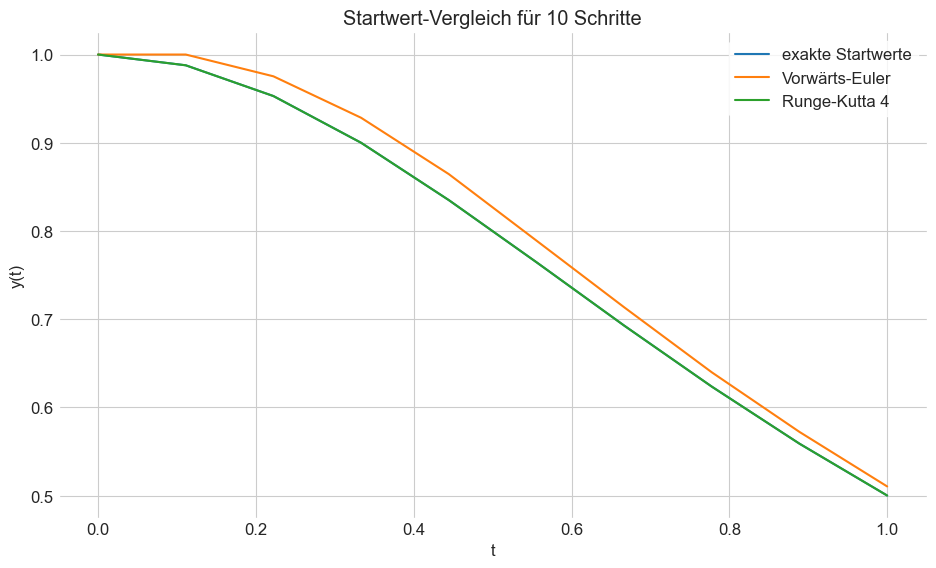

In [5]:
def f(t, y):
    return -2 * t * y**2

def exact(t):
    return 1 / (t**2 + 1)

y0 = 1
N = 10
t = np.linspace(0, 1, N)

inits1 = forwardEuler(f, y0, t[0:5])[1:]
inits2 = RungeKutta4(f, y0, t[0:5])[1:]
inits3 = exact(t[1:5])

y1 = AdamsBashforth(f, y0, t, inits=inits1)
y2 = AdamsBashforth(f, y0, t, inits=inits2)
y3 = AdamsBashforth(f, y0, t, inits=inits3)

plt.plot(t, y3, label="exakte Startwerte")
plt.plot(t, y1, label="Vorwärts-Euler")
plt.plot(t, y2, label="Runge-Kutta 4")
plt.title(f"Startwert-Vergleich für {N} Schritte")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.show()

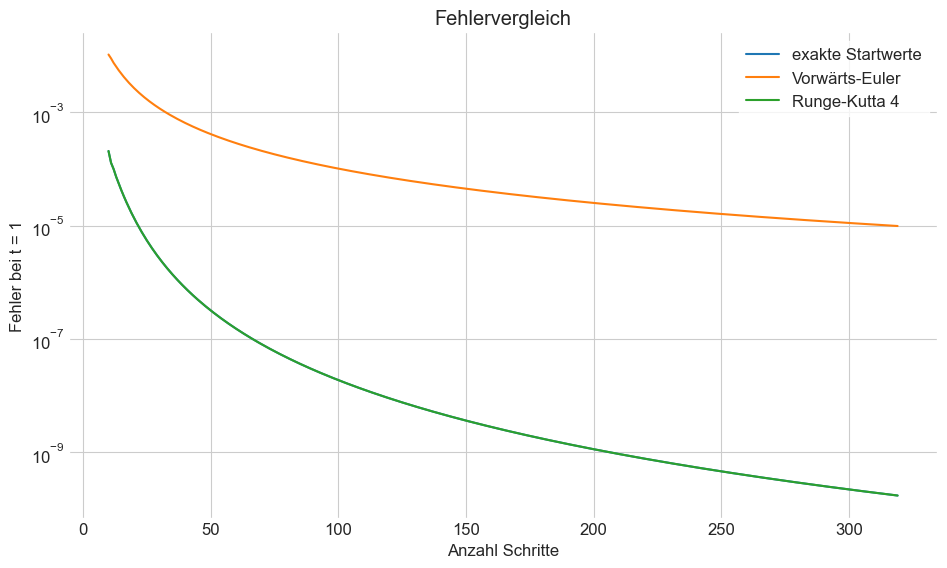

Approximierte Konvergenzordnung
Vorwärts-Euler:     2.01
Runge-Kutta 4:      4.04
exakte Startwerte:  4.04


In [6]:
def error(n):
    '''Error at t=1'''
    t = np.linspace(0, 1, n)
    
    inits1 = forwardEuler(f, y0, t[0:5])[1:]
    inits2 = RungeKutta4(f, y0, t[0:5])[1:]
    inits3 = exact(t[1:5])

    y1 = AdamsBashforth(f, y0, t, inits=inits1)
    y2 = AdamsBashforth(f, y0, t, inits=inits2)
    y3 = AdamsBashforth(f, y0, t, inits=inits3)
    
    e1 = np.abs(exact(1) - y1[-1])
    e2 = np.abs(exact(1) - y2[-1])
    e3 = np.abs(exact(1) - y3[-1])
    return (e1, e2, e3)

def order(errors):
    '''Approximation of order of convergence'''
    return np.log(errors[-1] / errors[0]) / np.log(steps[0] / steps[-1])

steps = np.arange(10, 320)
errors = np.array([error(n) for n in steps]).T

plt.plot(steps, errors[2], label="exakte Startwerte")
plt.plot(steps, errors[0], label="Vorwärts-Euler")
plt.plot(steps, errors[1], label="Runge-Kutta 4")
plt.yscale("log")
plt.xlabel("Anzahl Schritte")
plt.ylabel("Fehler bei t = 1")
plt.title("Fehlervergleich")
plt.legend()
plt.show()

print(f"Approximierte Konvergenzordnung")
print(f"Vorwärts-Euler: {order(errors[0]):8.2f}")
print(f"Runge-Kutta 4: {order(errors[1]):9.2f}")
print(f"exakte Startwerte: {order(errors[2]):5.2f}")

#### Beobachtungen

Obwohl das Vorwärts-Euler-Verfahren nur Konvergenzordnung 1 hat, schafft das Adams-Bashforth mit dessen Startwerte trotzdem mit Ordnung 2 zu konvergieren.
Mit der Runge-Kutta-Methode, die wie das Adams-Bashforth-Verfahren Konvergenzordnung 4 hat, kommen wir daher auf die selbe Ordnung 4 wie mit den exakten Startwerten.
Runge-Kutta ist also für die Startwert-Ermittlung zu bevorzugen.